# **EDA and Data Cleaning**

In [1]:
import pandas as pd
import os
from os.path import join as opjoin
from glob import glob
from PIL import Image, ExifTags
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
#dataset_path = '/mnt/fred/reddit/database_1597063213/'
dataset_path = 'H://reddit/database_1597138244/'
df = pd.read_csv(opjoin(dataset_path, 'submissions.csv'))
print('{} submissions loaded...'.format(len(df)))

7995 submissions loaded...


In [3]:
df.head()

,author,created_utc,id,is_video,num_comments,permalink,score,title,url
0,Kelly240361,1595662427,hxitxn,False,43,/r/NatureIsFuckingLit/comments/hxitxn/cliffs_a...,161,"🔥 Cliffs at Dorset, England",https://i.imgur.com/7XUQeg7.jpg
1,redditsdaddio,1595640242,hxe5kk,False,27,/r/NatureIsFuckingLit/comments/hxe5kk/piebald_...,343,🔥 Piebald Deer 🔥,https://i.redd.it/ex7x37i5owc51.jpg
2,jillison_flook,1595625776,hxadzw,False,53,/r/NatureIsFuckingLit/comments/hxadzw/ocelittle/,419,🔥 Ocelittle 🔥,https://i.redd.it/glqvqmo4hvc51.jpg
3,d3333p7,1595621456,hx931q,False,34,/r/NatureIsFuckingLit/comments/hx931q/bear_chi...,471,🔥 Bear chilling by a lake,https://i.imgur.com/AxUPw0W.jpg
4,exoduscv,1595619724,hx8k16,False,32,/r/NatureIsFuckingLit/comments/hx8k16/water_dr...,651,🔥 Water droplets condensing on a fly 🔥,https://i.redd.it/j93cmny4zuc51.jpg


## **Image Data**

### **Data Cleaning**

**We first check if the image file of a submissions is present and healty (can be opened by PIL) and remove affected submissions from the dataframe. Image filename, width and height are furthermore extracted and added to the dataframe for means of convenient data exploration.**

In [4]:
img_sizes = []
filenames = []
dirty = []
for id in df['id']:
    filepath = glob(opjoin(dataset_path, 'images', id + '*'))[0]
    try:
        img = Image.open(filepath)
        img_sizes.append(list(img.size))
        
        head, tail = os.path.split(filepath)
        filenames.append(tail)
    except:
        dirty.append(id)
    
print('{} images found, {} dirty submissions...'.format(len(img_sizes), len(dirty)))

7972 images found, 23 dirty submissions...


In [5]:
df = df[~df['id'].isin(dirty)]
df['width'] = list(zip(*img_sizes))[0]
df['height'] = list(zip(*img_sizes))[1]
df['imgfile'] = filenames
df.head()

,author,created_utc,id,is_video,num_comments,permalink,score,title,url,width,height,imgfile
0,Kelly240361,1595662427,hxitxn,False,43,/r/NatureIsFuckingLit/comments/hxitxn/cliffs_a...,161,"🔥 Cliffs at Dorset, England",https://i.imgur.com/7XUQeg7.jpg,480,599,hxitxn.jpeg
1,redditsdaddio,1595640242,hxe5kk,False,27,/r/NatureIsFuckingLit/comments/hxe5kk/piebald_...,343,🔥 Piebald Deer 🔥,https://i.redd.it/ex7x37i5owc51.jpg,130,60,hxe5kk.jpeg
2,jillison_flook,1595625776,hxadzw,False,53,/r/NatureIsFuckingLit/comments/hxadzw/ocelittle/,419,🔥 Ocelittle 🔥,https://i.redd.it/glqvqmo4hvc51.jpg,1200,1179,hxadzw.jpeg
3,d3333p7,1595621456,hx931q,False,34,/r/NatureIsFuckingLit/comments/hx931q/bear_chi...,471,🔥 Bear chilling by a lake,https://i.imgur.com/AxUPw0W.jpg,1080,565,hx931q.jpeg
4,exoduscv,1595619724,hx8k16,False,32,/r/NatureIsFuckingLit/comments/hx8k16/water_dr...,651,🔥 Water droplets condensing on a fly 🔥,https://i.redd.it/j93cmny4zuc51.jpg,1080,1350,hx8k16.jpeg


**A look at the image size histograms shows a spike for certain image width/height combinations. Those are dummy images served by the host server in case a requested image has been deleted. Such submissions can't be used for our purposes and are thus also remove from the dataframe.**

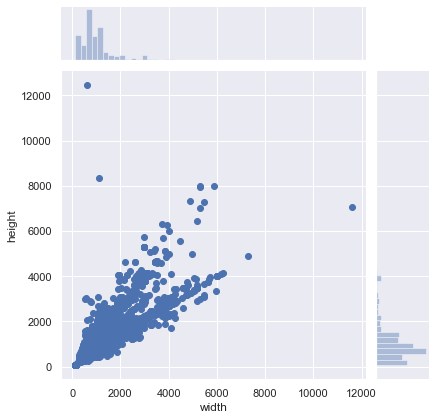

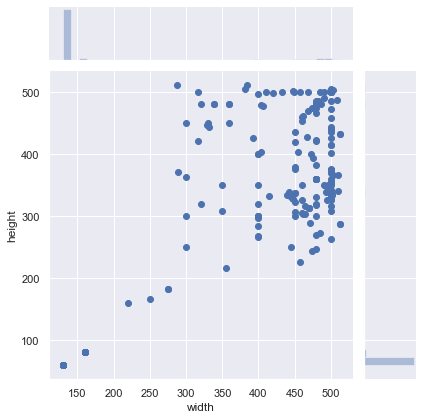

In [6]:
sns.jointplot(x='width', y='height', data=df)
sns.jointplot(x='width', y='height', data=df[(df['width'] <= 512) & (df['height'] <= 512)])

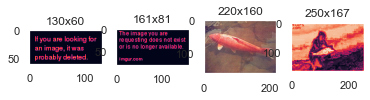

In [7]:
df_small = df[(df['width'] <= 256) & (df['height'] <= 256)]
df_small_unique = df_small.drop_duplicates(['width', 'height'])
fig, ax = plt.subplots(1, len(df_small_unique))
for i, (index, row) in enumerate(df_small_unique.iterrows()):
    img = Image.open(opjoin(dataset_path, 'images', row['imgfile']))
    img_arr = np.asarray(img)
    ax[i].set_title('{}x{}'.format(row['width'], row['height']))
    ax[i].grid(False)
    ax[i].imshow(img_arr)
plt.show()

In [8]:
oldLen = len(df)
condition = ((df['width'] == 130) & (df['height'] == 60)) | ((df['width'] == 161) & (df['height'] == 81))
df = df[~condition]
print('{} images were already deleted...'.format(oldLen - len(df)))

1071 images were already deleted...


**Save cleaned dataframe to new file.**

In [9]:
with open(opjoin(dataset_path, 'submissions_.csv'), 'w', encoding='utf-8') as f:
    df.to_csv(f, index = False, line_terminator='\n')

## **Data Exploration**